# Sentimen Analyst Presidential Candidate Indonesia


use Naive Bayes

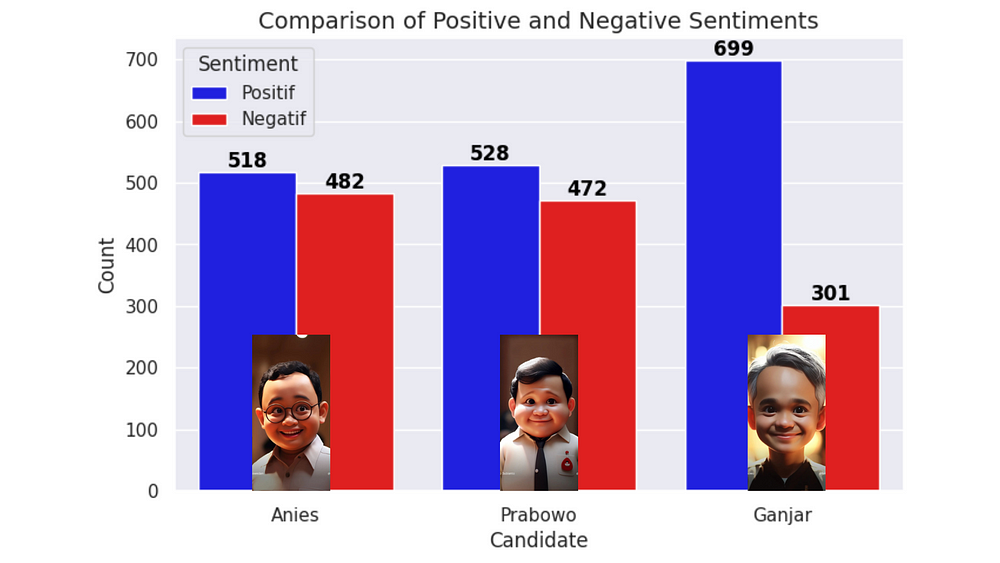

## 0. Import Library Data

In [ ]:
#For Preprocessing
!pip install Sastrawi tweet-preprocessor textblob wordcloud nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.0 MB/s eta 0:00:00


In [ ]:
# !pip install translate

In [ ]:
#for Translate
!pip install googletrans==4.0.0-rc1

In [ ]:
#For Labeling
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [ ]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary


import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
df1 = pd.read_csv('/content/all_anies.csv')
df2 = pd.read_csv('/content/all_prabowo.csv')
df3 = pd.read_csv('/content/all_ganjar.csv')

In [ ]:
df1.head(1)

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1.757456e+18,Tue Feb 13 17:24:01 +0000 2024,10467,03 tidak akan pernah berkoalisi dengan 01. Ibu...,1.757456e+18,https://pbs.twimg.com/amplify_video_thumb/1757...,NaN,in,NaN,394,361,2282,https://x.com/AndrewsTjan/status/1757455598273...,1176673445263765504,AndrewsTjan


In [ ]:
df2.head(1)

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,...,tweet_url,user_id_str,username,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,1.757550e+18,Tue Feb 13 23:33:21 +0000 2024,2601,https://t.co/DZEz4VDCN8,1.757550e+18,https://pbs.twimg.com/media/GGQRFjuaEAA6uYQ.jpg,NaN,zxx,NaN,7,...,https://x.com/prabowogibran2/status/1757548545...,1.72394E+18,prabowogibran2,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df3.head(1)

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1754143146311860419,Sun Feb 04 14:01:31 +0000 2024,63148,Anies: Bansos itu dibagiinnya bukan di pinggir...,1754143146311860419,https://pbs.twimg.com/media/GFf35EDaMAAQvwn.jpg,NaN,in,NaN,771,476,7368,https://x.com/kisutiii/status/1754143146311860419,1624392821154414593,kisutiii


In [ ]:
df1.columns

Index(['conversation_id_str', 'created_at', 'favorite_count', 'full_text',
       'id_str', 'image_url', 'in_reply_to_screen_name', 'lang', 'location',
       'quote_count', 'reply_count', 'retweet_count', 'tweet_url',
       'user_id_str', 'username'],
      dtype='object')

In [ ]:
df1 = df1[['full_text','username','created_at']]
df2 = df2[['full_text','username','created_at']]
df3 = df3[['full_text','username','created_at']]

In [ ]:
df1.head(1)

,full_text,username,created_at
0,03 tidak akan pernah berkoalisi dengan 01. Ibu...,AndrewsTjan,Tue Feb 13 17:24:01 +0000 2024


##1. Cleaning Data

### Data Anies

In [ ]:
df1.shape

(2525, 3)

In [ ]:
df1 = df1.drop_duplicates(subset='full_text')
df1.dropna(inplace=True)
df1.isnull().sum()

<ipython-input-13-607a11112d86>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(inplace=True)


,0
full_text,0
username,0
created_at,0




---



### Data Prabowo

In [ ]:
df2.shape

(8946, 3)

In [ ]:
df2 = df2.drop_duplicates(subset='full_text')
df2.dropna(inplace=True)
df2.isnull().sum()

<ipython-input-15-390ee34ee7a5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(inplace=True)


,0
full_text,0
username,0
created_at,0




---



### data Ganjar

In [ ]:
df3.shape

(2290, 3)

In [ ]:
df3 = df3.drop_duplicates(subset='full_text')
df3.dropna(inplace=True)
df3.isnull().sum()

<ipython-input-17-13a8e702e08f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.dropna(inplace=True)


,0
full_text,0
username,0
created_at,0




---



### Clean Data all Capres

In [ ]:
df1 = df1[['full_text', 'username', 'created_at']].sample(1000, random_state=42)
df2 = df2[['full_text', 'username', 'created_at']].sample(1000, random_state=42)
df3 = df3[['full_text', 'username', 'created_at']].sample(1000, random_state=42)

In [ ]:
print(df1.shape , df2.shape , df3.shape)

(1000, 3) (1000, 3) (1000, 3)


In [ ]:
def clean_twitter_text(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text)
  text = re.sub(r'https?://[A-Za-z0-9./]+', '', text)
  text = re.sub(r'[^\w\s]', '', text)
  text = re.sub(r'\d+', '', text)
  text = re.sub(r'\s+', ' ', text)
  text = text.strip()

  return text


df1['full_text'] = df1['full_text'].apply(clean_twitter_text)
df1['full_text'] = df1['full_text'].str.lower()

df2['full_text'] = df2['full_text'].apply(clean_twitter_text)
df2['full_text'] = df2['full_text'].str.lower()

df3['full_text'] = df3['full_text'].apply(clean_twitter_text)
df3['full_text'] = df3['full_text'].str.lower()

In [ ]:
df1.head(1)

,full_text,username,created_at
101,ya terus maunya gimanaaaaa kan tadi sendirinya...,indrasbitchhere,Sun Feb 11 08:59:15 +0000 2024


##2. Preprocessing

* Normalisasi
* Stopword
* Tokenize
* Stemming



### Normalisasi

In [ ]:
# Mencoba membaca file dengan encoding yang lebih toleran terhadap error
df = pd.read_csv("/content/new_kamusalay.csv", header=None, names=["alay", "baku"], encoding="latin1")

# Konversi ke format dictionary
kamus_alay = dict(zip(df["alay"], df["baku"]))
kamus_alay

def normalizad(text):
    words = text.split()  # Memisahkan kata-kata dalam teks
    normalized_words = [kamus_alay.get(word, word) for word in words]  # Mengganti kata jika ada dalam kamus
    return " ".join(normalized_words)
kamus_alay = dict(zip(df["alay"], df["baku"]))
kamus_alay

In [ ]:
df1['full_text'] = df1['full_text'].apply(normalizad)
df2['full_text'] = df2['full_text'].apply(normalizad)
df3['full_text'] = df3['full_text'].apply(normalizad)

In [ ]:
df1.head(3)

,full_text,username,created_at
101,ya terus maunya gimanaaaaa kan tadi sendirinya...,indrasbitchhere,Sun Feb 11 08:59:15 +0000 2024
260,kampanye akbar anies amin luar biasa antusias ...,Andria75777,Sun Feb 11 00:10:06 +0000 2024
2224,_asmara penyambutan anies di kuala namu,erwanblack15,Thu Feb 01 09:21:38 +0000 2024


In [ ]:
# Normalisasi anies
norm_anies = { " ganjar ":" ", " prabowo ": " "}

def normali_anies(str_text):
  for i in norm_anies:
    str_text = str_text.replace(i, norm_anies[i])
  return str_text

df1['full_text'] = df1['full_text'].apply(lambda x: normali_anies(x))
df1.head(3)

,full_text,username,created_at
101,ya terus maunya gimanaaaaa kan tadi sendirinya...,indrasbitchhere,Sun Feb 11 08:59:15 +0000 2024
260,kampanye akbar anies amin luar biasa antusias ...,Andria75777,Sun Feb 11 00:10:06 +0000 2024
2224,_asmara penyambutan anies di kuala namu,erwanblack15,Thu Feb 01 09:21:38 +0000 2024


In [ ]:
# Normalisasi prabowo
norm_prabowo = { " ganjar ":" ", " anies ": " "}

def normali_prabowo(str_text):
  for i in norm_prabowo:
    str_text = str_text.replace(i, norm_prabowo[i])
  return str_text

df2['full_text'] = df2['full_text'].apply(lambda x: normali_prabowo(x))
df2.head(3)

,full_text,username,created_at
149,rata orang tidak suka prabowo cuma satu karena...,lilmeowed,Tue Feb 13 16:35:17 +0000 2024
1025,harus diakui kehadiran dokter terawan pada deb...,171cakmus,Sun Feb 04 22:47:33 +0000 2024
6883,singkong jadi bahan pangan prabowo mending jad...,QadarRamad3,Tue Jan 02 06:20:16 +0000 2024


In [ ]:
# Normalisasi ganjar
norm_ganjar = { " prabowo ":" ", " anies ": " "}

def normali_ganjar(str_text):
  for i in norm_ganjar:
    str_text = str_text.replace(i, norm_ganjar[i])
  return str_text

df3['full_text'] = df3['full_text'].apply(lambda x: normali_ganjar(x))
df3.head(3)

,full_text,username,created_at
301,dimana rasa malunya jokowi bansos dari uang ra...,wandarafiah,Fri Feb 02 01:34:36 +0000 2024
1764,dalam debat ganjar memberikan gambaran jelas t...,finarahaniiii,Fri Feb 09 02:55:28 +0000 2024
2141,melalui pengalaman sebagai wakil rakyat mas ga...,FMarwati65,Mon Feb 12 04:22:59 +0000 2024




---



### Stopword

In [ ]:
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
# Stopwords
more_stop_words = ["tidak"]

stop_words = StopWordRemoverFactory().get_stop_words()
stop_words.extend(more_stop_words)

new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopword(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df1['full_text'] = df1['full_text'].apply(lambda x: stopword(x))
df2['full_text'] = df2['full_text'].apply(lambda x: stopword(x))
df3['full_text'] = df3['full_text'].apply(lambda x: stopword(x))

### Tokenized

In [ ]:
# Tokenize
tokenized_anies = df1['full_text'].apply(lambda x:x.split())
tokenized_anies

,full_text
101,"[terus, maunya, gimanaaaaa, kan, tadi, sendiri..."
260,"[kampanye, akbar, anies, amin, luar, biasa, an..."
2224,"[_asmara, penyambutan, anies, kuala, namu]"
109,"[apa, agama, nya, terap, anies, pilihannya]"
751,"[kelakuan, uti, gue, this, is, sumatra, basisn..."
...,...
8,"[padahal, memang, pintar, komennya, gue, lihat..."
159,"[uang, muka, nol, memang, persentasenya, palin..."
36,"[pak, anies, nya, tentu, mau, sih, blio, paham..."
452,"[anies, juru, bicara, kepresidenan, muhaimin, ..."


In [ ]:
# Tokenize
tokenized_prabowo = df2['full_text'].apply(lambda x:x.split())
tokenized_prabowo

,full_text
149,"[rata, orang, suka, prabowo, cuma, satu, gibra..."
1025,"[diakui, kehadiran, dokter, terawan, debat, ca..."
6883,"[singkong, jadi, bahan, pangan, prabowo, mendi..."
720,"[bukti, gagal, nya, tahun, jokowi, menjabat, t..."
325,"[mampus, douglas, joget, joget, kan, kamu, buk..."
...,...
1490,"[tim, tiktok, sudah, menyiapkan, gimmik, dibre..."
1174,"[menunggu, vt, pak, prabowo, meminta, maaf, pa..."
8117,"[ceo, polmark, indonesia, eep, saefulloh, fata..."
1175,"[setuju, sependapat, saya, pilih, orang, jelas..."


In [ ]:
# Tokenize
tokenized_ganjar = df3['full_text'].apply(lambda x:x.split())
tokenized_ganjar

,full_text
301,"[rasa, malunya, jokowi, bansos, uang, rakyat, ..."
1764,"[debat, ganjar, memberikan, gambaran, jelas, b..."
2141,"[melalui, pengalaman, wakil, rakyat, mas, ganj..."
657,"[masyarakat, optimis, ganjarmahfud, membawa, i..."
2202,"[ganjar, mahfud, semakin, mengukuhkan, posisin..."
...,...
1471,"[akses, internet, luas, berkat, ganjarmahfud, ..."
381,"[putaran, kedua, suara, lari, yaitu, pemilih, ..."
83,"[provinsi, jawa, tengah, bawah, kepemimpinan, ..."
1722,"[suksesnya, konser, salam, mtal, membuktikan, ..."


### Stemming

In [ ]:
# Stemming
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  do = []
  for w in text_cleaning:
    dt = stemmer.stem(w)
    do.append(dt)
  d_clean = []
  d_clean = " ".join(do)
  print(d_clean)
  return d_clean

tokenized_anies = tokenized_anies.apply(stemming)
tokenized_prabowo = tokenized_prabowo.apply(stemming)
tokenized_ganjar = tokenized_ganjar.apply(stemming)

terus mau gimanaaaaa kan tadi sendiri tanya anies pernah tempat ibadah masjid enggak gilir kasih bukti kunjung bangun rumah ibadah agama malah bilang cuma formalitas tidak mendeliver pesan toleransi nasional
kampanye akbar anies amin luar biasa antusias dukung anies tuju ubah
asmara sambut anies kuala namu
apa agama nya terap anies pilih
laku uti gue this is sumatra basis gerindra memang kuat banget nenek umur tahun cuma lulus sltp tau mana kampanye bersih dusun mau aspal sama calon legislatif tetapi uti gue pilih kubu tidak janjiin apa foto tib sama single picture anies
literasi penting bodoh banyak makan korban desak anies keren semarang
pantas pak anies selalu mention lihat rekam jejak lihat rekam jejak
bahagia sendiri buat bagi jis kemarin sedikit banyak bisa bantu bagi hadir bagi video nya sini sama ketua umum sobat anies rawan sobat anies yang pilih damping anggota berba sobatanies aminajadulu
benar jadi makin gahabis pikir sama pilih selalu bilang gaseneng dengar pak anies bicar

In [ ]:
tokenized_anies.to_csv('tokenized_anies.csv', index=False)
tokenized_prabowo.to_csv('tokenized_prabowo.csv', index=False)
tokenized_ganjar.to_csv('tokenized_ganjar.csv', index=False)

##3. Translate

In [ ]:
# !pip install translate

In [ ]:
data_anies = pd.read_csv('/content/tokenized_anies.csv')
data_prabowo = pd.read_csv('/content/tokenized_prabowo.csv')
data_ganjar = pd.read_csv('/content/tokenized_ganjar.csv')

In [ ]:
data_anies.head(1)

,full_text
0,terus mau gimanaaaaa kan tadi sendiri tanya an...


In [ ]:
data_prabowo.head(1)

,full_text
0,rata orang suka prabowo cuma satu gibran makan...


In [ ]:
data_ganjar.head(1)

,full_text
0,rasa malu jokowi bansos uang rakyat malah buat...


In [ ]:
# !pip install googletrans==4.0.0-rc1

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 5.9 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17397 sha256=8375aed720147ac5b4c81a05357141203bf45dc2904d22ddd6a550a334a8de5a
  Stored in directory: /root/.cache/pip/wheels/39/17/6f/66a045ea3d168826074691b4b787b8f324d3f646d755443fda
Successfully built googletrans
  Attempting uninstall: hyperframe
    Found existing installation: hyperframe 6.1.0
    Uninstalling hyperfram

In [ ]:
from googletrans import Translator

# Inisialisasi translator
translator = Translator()

def convert_eng(tweet):
    try:
        # Pastikan input berupa string
        tweet = str(tweet)
        # Terjemahkan teks dari Bahasa Indonesia ke Inggris
        translation = translator.translate(tweet, src="id", dest="en")
        return translation.text  # Mengambil teks hasil terjemahan
    except Exception as e:
        return f"Error: {e}"  # Menampilkan error jika terjadi masalah

# Menerapkan normalisasi ke dataset
data_anies['tweet_english'] = data_anies['full_text'].apply(convert_eng)
data_prabowo['tweet_english'] = data_prabowo['full_text'].apply(convert_eng)
data_ganjar['tweet_english'] = data_ganjar['full_text'].apply(convert_eng)


In [ ]:
data_anies.to_csv('Terjemah_data_anies.csv', index=False)
data_prabowo.to_csv('Terjemah_data_prabowo.csv', index=False)
data_ganjar.to_csv('Terjemah_data_ganjar.csv', index=False)

## 4. Labeling

In [ ]:
data_anies = pd.read_csv('/content/Terjemah_data_anies.csv')
data_prabowo = pd.read_csv('/content/Terjemah_data_prabowo.csv')
data_ganjar = pd.read_csv('/content/Terjemah_data_ganjar.csv')

### Labeling Anies

In [ ]:
data_tweet_anies = list(data_anies['tweet_english'])
polaritas = 0

status_anies = []

for tweet in data_tweet_anies:
  tweet = TextBlob(tweet)
  polaritas = tweet.sentiment.polarity
data_tweet_anies = list(data_anies['tweet_english'])
polaritas = 0

status_anies = []

for tweet in data_tweet_anies:
  tweet = TextBlob(tweet)
  polaritas = tweet.sentiment.polarity
  if polaritas > 0:
    status_anies.append('positif')
  else:
    status_anies.append('negatif')

print('Jumlah data positif :', status_anies.count('positif'))
print('Jumlah data negatif :', status_anies.count('negatif'))

Jumlah data positif : 518
Jumlah data negatif : 482


### Labeling Prabowo

In [ ]:
data_tweet_prabowo = list(data_prabowo['tweet_english'])
polaritas = 0

status_prabowo = []

for tweet in data_tweet_prabowo:
  tweet = TextBlob(tweet)
  polaritas = tweet.sentiment.polarity
data_tweet_prabowo = list(data_prabowo['tweet_english'])
polaritas = 0

status_prabowo = []

for tweet in data_tweet_prabowo:
  tweet = TextBlob(tweet)
  polaritas = tweet.sentiment.polarity
  if polaritas > 0:
    status_prabowo.append('positif')
  else:
    status_prabowo.append('negatif')

print('Jumlah data positif :', status_prabowo.count('positif'))
print('Jumlah data negatif :', status_prabowo.count('negatif'))

Jumlah data positif : 528
Jumlah data negatif : 472


### Labeling Ganjar

In [ ]:
data_tweet_ganjar = list(data_ganjar['tweet_english'])
polaritas = 0

status_ganjar = []

for tweet in data_tweet_ganjar:
  tweet = TextBlob(tweet)
  polaritas = tweet.sentiment.polarity
data_tweet_ganjar = list(data_ganjar['tweet_english'])
polaritas = 0

status_ganjar = []

for tweet in data_tweet_ganjar:
  tweet = TextBlob(tweet)
  polaritas = tweet.sentiment.polarity
  if polaritas > 0:
    status_ganjar.append('positif')
  else:
    status_ganjar.append('negatif')

print('Jumlah data positif :', status_ganjar.count('positif'))
print('Jumlah data negatif :', status_ganjar.count('negatif'))

Jumlah data positif : 699
Jumlah data negatif : 301


In [ ]:
data_anies['klasifikasi'] = status_anies
data_prabowo['klasifikasi'] = status_prabowo
data_ganjar['klasifikasi'] = status_ganjar

In [ ]:
data_anies.to_csv('labeling_anies.csv', index=False)
data_prabowo.to_csv('labeling_prabowo.csv', index=False)
data_ganjar.to_csv('labeling_ganjar.csv', index=False)

## 5. Visualization

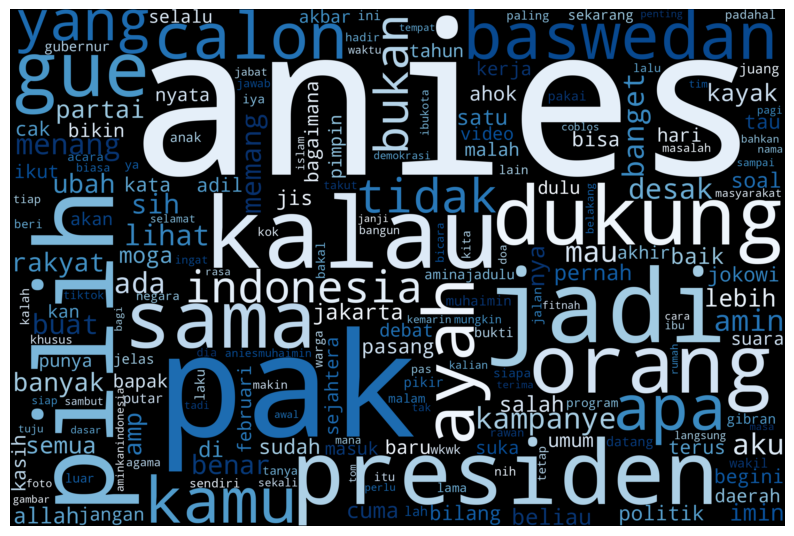

In [ ]:
from wordcloud import WordCloud , STOPWORDS
import matplotlib.pyplot as plt

def plot_cloud(wordCloud):
  plt.figure(figsize=(10,8))
  plt.imshow(wordCloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()

all_words = ' '.join([str(tweets) for tweets in data_anies['full_text']])

wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='black',
    colormap='Blues_r',
    collocations=False,
    stopwords=STOPWORDS

    ).generate(all_words)

plot_cloud(wordcloud)

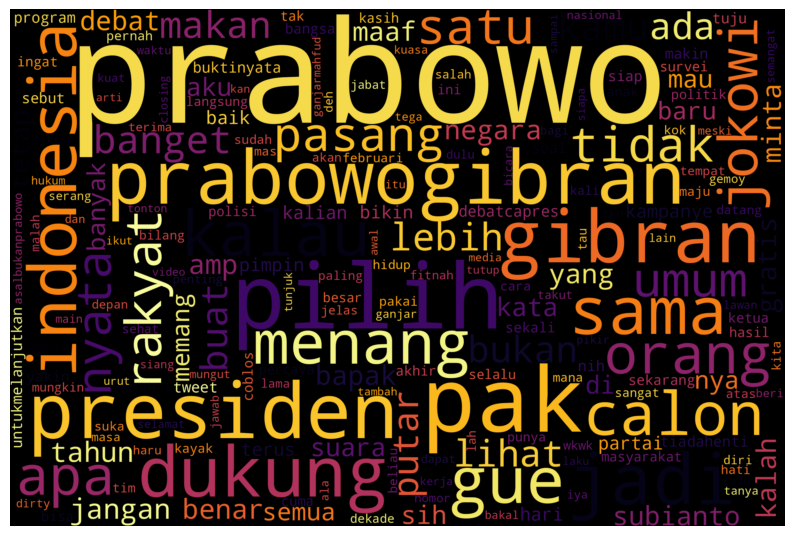

In [ ]:
from wordcloud import WordCloud , STOPWORDS
import matplotlib.pyplot as plt

def plot_cloud(wordCloud):
  plt.figure(figsize=(10,8))
  plt.imshow(wordCloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()

all_words = ' '.join([str(tweets) for tweets in data_prabowo['full_text']])

wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='black',
    colormap='inferno',
    collocations=False,
    stopwords=STOPWORDS

    ).generate(all_words)

plot_cloud(wordcloud)

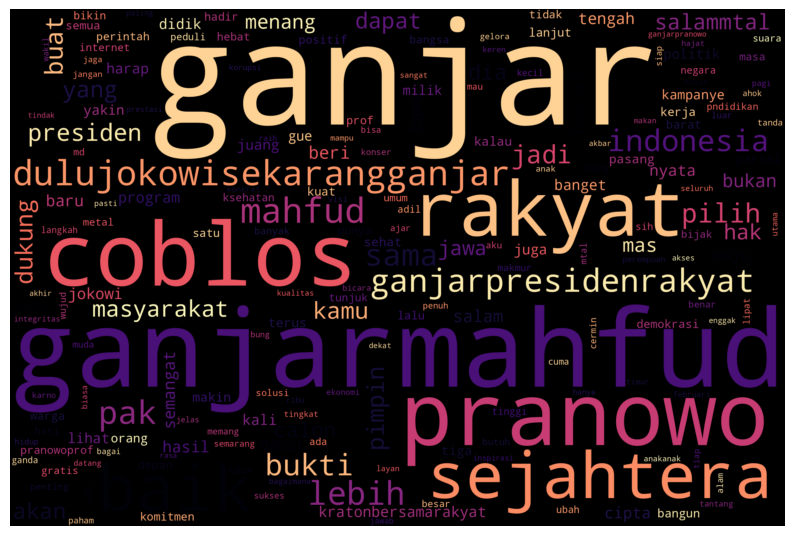

In [ ]:
from wordcloud import WordCloud , STOPWORDS
import matplotlib.pyplot as plt

def plot_cloud(wordCloud):
  plt.figure(figsize=(10,8))
  plt.imshow(wordCloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()

all_words = ' '.join([str(tweets) for tweets in data_ganjar['full_text']])

wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='black',
    colormap='magma',
    collocations=False,
    stopwords=STOPWORDS

    ).generate(all_words)

plot_cloud(wordcloud)

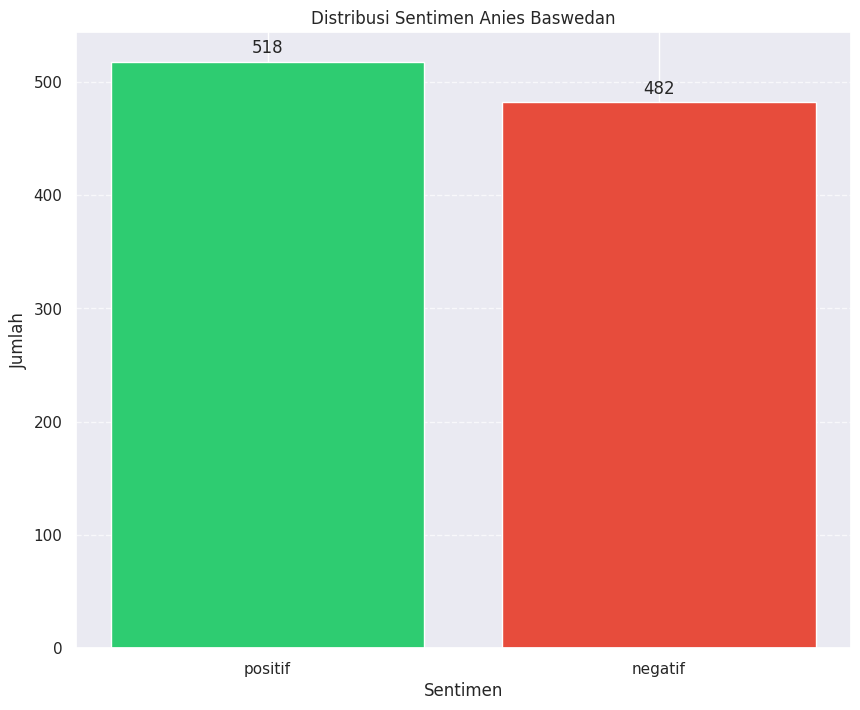

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['positif', 'negatif']
sizes = [status_anies.count('positif'), status_anies.count('negatif')]

def show_bar_chart(labels, sizes):
    fig, ax = plt.subplots(figsize=(10,8))

    bars = ax.bar(labels, sizes, color=['#2ECC71', '#E74C3C'])

    # Menambahkan label di atas batang
    for bar, size in zip(bars, sizes):
        height = bar.get_height()
        ax.annotate(f'{size}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # Offset posisi teks
                    textcoords='offset points',
                    ha='center', va='bottom')

    # Menambahkan grid horizontal untuk keterbacaan
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # Label dan judul
    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title('Distribusi Sentimen Anies Baswedan')

    plt.show()

show_bar_chart(labels, sizes)


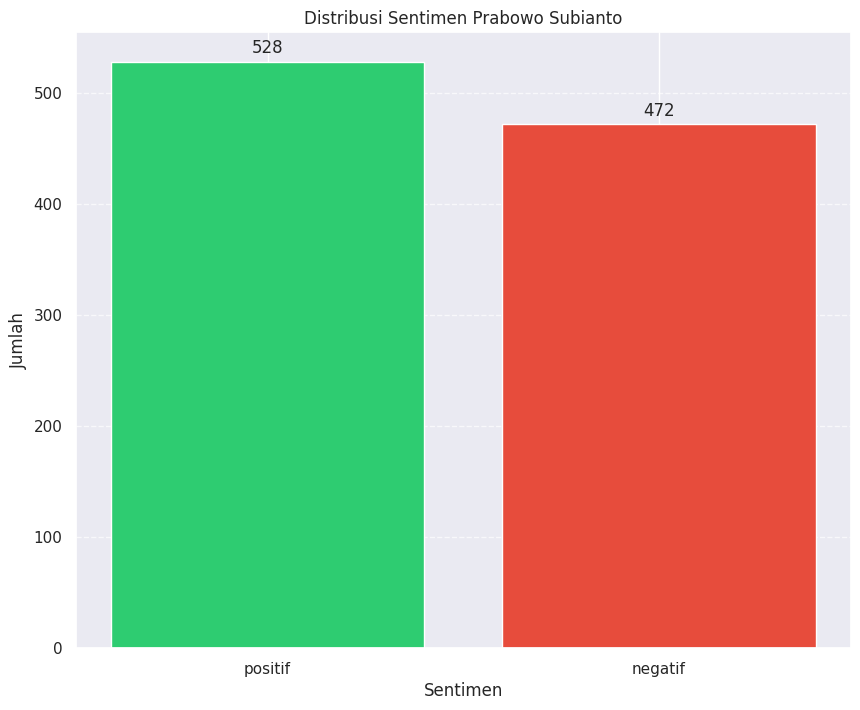

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['positif', 'negatif']
sizes = [status_prabowo.count('positif'), status_prabowo.count('negatif')]

def show_bar_chart(labels, sizes):
    fig, ax = plt.subplots(figsize=(10,8))

    bars = ax.bar(labels, sizes, color=['#2ECC71', '#E74C3C'])

    # Menambahkan label di atas batang
    for bar, size in zip(bars, sizes):
        height = bar.get_height()
        ax.annotate(f'{size}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # Offset posisi teks
                    textcoords='offset points',
                    ha='center', va='bottom')

    # Menambahkan grid horizontal untuk keterbacaan
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # Label dan judul
    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title('Distribusi Sentimen Prabowo Subianto')

    plt.show()

show_bar_chart(labels, sizes)


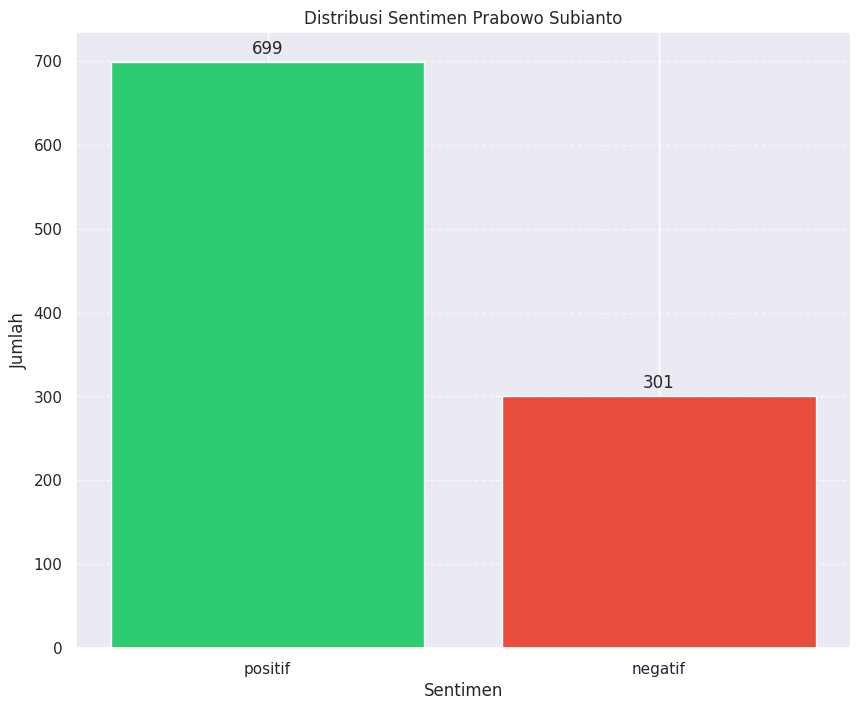

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['positif', 'negatif']
sizes = [status_ganjar.count('positif'), status_ganjar.count('negatif')]

def show_bar_chart(labels, sizes):
    fig, ax = plt.subplots(figsize=(10,8))

    bars = ax.bar(labels, sizes, color=['#2ECC71', '#E74C3C'])

    # Menambahkan label di atas batang
    for bar, size in zip(bars, sizes):
        height = bar.get_height()
        ax.annotate(f'{size}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # Offset posisi teks
                    textcoords='offset points',
                    ha='center', va='bottom')

    # Menambahkan grid horizontal untuk keterbacaan
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # Label dan judul
    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title('Distribusi Sentimen Prabowo Subianto')

    plt.show()

show_bar_chart(labels, sizes)


##6. Classification Sentimen

In [ ]:
import random
import nltk
import pandas as pd
from textblob import TextBlob
from textblob.classifiers import NaiveBayesClassifier

# Download NLTK package
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Naive Bayes Classifier

In [ ]:
# Fungsi untuk membaca data dan melakukan labeling sentimen
def load_and_label_data(file_path, title):
    data = pd.read_csv(file_path)

    if 'tweet_english' not in data.columns:
        print(f"Kolom 'tweet_english' tidak ditemukan dalam {title}.")
        return None

    data_tweet = data['tweet_english'].tolist()
    status = []

    for tweet in data_tweet:
        sentiment = TextBlob(tweet).sentiment.polarity
        status.append('positif' if sentiment > 0 else 'negatif')

    # Menambahkan label ke dataset
    data['klasifikasi'] = status

    # Menyimpan dataset dengan label baru
    labeled_file = f"labeling_{title.lower()}.csv"
    data.to_csv(labeled_file, index=False)

    print(f"Dataset {title} berhasil dilabel dan disimpan sebagai {labeled_file}.")

    return data

In [ ]:
# Load dan label data untuk Anies, Prabowo, dan Ganjar
data_anies = load_and_label_data('/content/Terjemah_data_anies.csv', 'Anies')
data_prabowo = load_and_label_data('/content/Terjemah_data_prabowo.csv', 'Prabowo')
data_ganjar = load_and_label_data('/content/Terjemah_data_ganjar.csv', 'Ganjar')

Dataset Anies berhasil dilabel dan disimpan sebagai labeling_anies.csv.
Dataset Prabowo berhasil dilabel dan disimpan sebagai labeling_prabowo.csv.
Dataset Ganjar berhasil dilabel dan disimpan sebagai labeling_ganjar.csv.


In [ ]:
# Fungsi untuk mengonversi dataset ke format yang dapat digunakan untuk klasifikasi
def convert_to_tuple_dataset(data, title):
    if data is None:
        print(f"Skipping dataset {title} karena data tidak ditemukan.")
        return []

    if 'full_text' in data.columns:
        data.drop(columns=['full_text'], inplace=True)

    return [tuple(x) for x in data.to_records(index=False)]

dataset_anies = convert_to_tuple_dataset(data_anies, "Anies")
dataset_prabowo = convert_to_tuple_dataset(data_prabowo, "Prabowo")
dataset_ganjar = convert_to_tuple_dataset(data_ganjar, "Ganjar")

In [ ]:
# Fungsi untuk memproses dataset dan menyeimbangkan data positif/negatif
def process_dataset(dataset, title):
    set_positif = []
    set_negatif = []

    for tweet in dataset:
        if len(tweet) == 2 and isinstance(tweet[0], str):
            if tweet[1] == 'positif':
                set_positif.append(tweet)
            elif tweet[1] == 'negatif':
                set_negatif.append(tweet)

    if len(set_positif) == 0 or len(set_negatif) == 0:
        print(f"Skipping dataset {title} karena data tidak seimbang atau label tidak ditemukan.")
        return []

    # Mengurangi jumlah data agar seimbang
    min_size = min(len(set_positif), len(set_negatif))
    set_positif = random.sample(set_positif, k=min_size)
    set_negatif = random.sample(set_negatif, k=min_size)

    train = set_positif + set_negatif
    return [(tweet[0], tweet[1]) for tweet in train]


In [ ]:
# Fungsi untuk melatih model Naive Bayes
def train_naive_bayes(train_set, dataset, title):
    if not train_set:
        print(f"Skipping training for {title} karena data tidak cukup.")
        return None

    classifier = NaiveBayesClassifier(train_set)
    if dataset:
        valid_dataset = [(d[0], d[1]) for d in dataset if len(d) == 2]
        accuracy = classifier.accuracy(valid_dataset) if valid_dataset else 0
    else:
        accuracy = 0

    print(f"Naive Bayes Accuracy for {title}: {accuracy}")
    return classifier


In [ ]:
# Proses dan latih model untuk setiap kandidat
train_set_anies = process_dataset(dataset_anies, "Anies")
classifier_anies = train_naive_bayes(train_set_anies, dataset_anies, "Anies")

train_set_prabowo = process_dataset(dataset_prabowo, "Prabowo")
classifier_prabowo = train_naive_bayes(train_set_prabowo, dataset_prabowo, "Prabowo")

train_set_ganjar = process_dataset(dataset_ganjar, "Ganjar")
classifier_ganjar = train_naive_bayes(train_set_ganjar, dataset_ganjar, "Ganjar")


data_anies = load_and_label_data('/content/Terjemah_data_anies.csv', 'Anies')
data_prabowo = load_and_label_data('/content/Terjemah_data_prabowo.csv', 'Prabowo')
data_ganjar = load_and_label_data('/content/Terjemah_data_ganjar.csv', 'Ganjar')


Naive Bayes Accuracy for Anies: 0.91
Naive Bayes Accuracy for Prabowo: 0.91
Naive Bayes Accuracy for Ganjar: 0.843
Dataset Anies berhasil dilabel dan disimpan sebagai labeling_anies.csv.
Dataset Prabowo berhasil dilabel dan disimpan sebagai labeling_prabowo.csv.
Dataset Ganjar berhasil dilabel dan disimpan sebagai labeling_ganjar.csv.


In [ ]:
# Fungsi untuk mengonversi dataset ke format yang dapat digunakan untuk klasifikasi
def convert_to_tuple_dataset(data, title):
    if data is None:
        print(f"Skipping dataset {title} karena data tidak ditemukan.")
        return []

    if 'full_text' in data.columns:
        data.drop(columns=['full_text'], inplace=True)

    return [tuple(x) for x in data.to_records(index=False)]

dataset_anies = convert_to_tuple_dataset(data_anies, "Anies")
dataset_prabowo = convert_to_tuple_dataset(data_prabowo, "Prabowo")
dataset_ganjar = convert_to_tuple_dataset(data_ganjar, "Ganjar")

In [ ]:
# Fungsi untuk memproses dataset dan menyeimbangkan data positif/negatif
def process_dataset(dataset, title):
    set_positif = []
    set_negatif = []

    for tweet in dataset:
        if len(tweet) == 2 and isinstance(tweet[0], str):
            if tweet[1] == 'positif':
                set_positif.append(tweet)
            elif tweet[1] == 'negatif':
                set_negatif.append(tweet)

    if len(set_positif) == 0 or len(set_negatif) == 0:
        print(f"Skipping dataset {title} karena data tidak seimbang atau label tidak ditemukan.")
        return []

    # Mengurangi jumlah data agar seimbang
    min_size = min(len(set_positif), len(set_negatif))
    set_positif = random.sample(set_positif, k=min_size)
    set_negatif = random.sample(set_negatif, k=min_size)

    train = set_positif + set_negatif
    return [(tweet[0], tweet[1]) for tweet in train]


In [ ]:
# Fungsi untuk melatih model Naive Bayes
def train_naive_bayes(train_set, dataset, title):
    if not train_set:
        print(f"Skipping training for {title} karena data tidak cukup.")
        return None

    classifier = NaiveBayesClassifier(train_set)
    if dataset:
        valid_dataset = [(d[0], d[1]) for d in dataset if len(d) == 2]
        accuracy = classifier.accuracy(valid_dataset) if valid_dataset else 0
    else:
        accuracy = 0

    print(f"Naive Bayes Accuracy for {title}: {accuracy}")
    return classifier

In [ ]:
# Proses dan latih model untuk setiap kandidat
train_set_anies = process_dataset(dataset_anies, "Anies")
classifier_anies = train_naive_bayes(train_set_anies, dataset_anies, "Anies")

train_set_prabowo = process_dataset(dataset_prabowo, "Prabowo")
classifier_prabowo = train_naive_bayes(train_set_prabowo, dataset_prabowo, "Prabowo")

train_set_ganjar = process_dataset(dataset_ganjar, "Ganjar")
classifier_ganjar = train_naive_bayes(train_set_ganjar, dataset_ganjar, "Ganjar")

Naive Bayes Accuracy for Anies: 0.918
Naive Bayes Accuracy for Prabowo: 0.926
Naive Bayes Accuracy for Ganjar: 0.845


In [ ]:
from sklearn.metrics import classification_report

def evaluate_model(classifier, dataset, title):
    if not classifier or not dataset:
        print(f"Skipping evaluation for {title} due to insufficient data.")
        return

    y_true = [label for _, label in dataset]
    y_pred = [classifier.classify(text) for text, _ in dataset]

    print(f"Evaluation Report for {title}:")
    print(classification_report(y_true, y_pred))

evaluate_model(classifier_anies, dataset_anies, "Anies")
evaluate_model(classifier_prabowo, dataset_prabowo, "Prabowo")
evaluate_model(classifier_ganjar, dataset_ganjar, "Ganjar")


Evaluation Report for Anies:
              precision    recall  f1-score   support

     negatif       0.86      0.99      0.92       482
     positif       0.99      0.85      0.91       518

    accuracy                           0.92      1000
   macro avg       0.92      0.92      0.92      1000
weighted avg       0.93      0.92      0.92      1000

Evaluation Report for Prabowo:
              precision    recall  f1-score   support

     negatif       0.87      0.99      0.93       472
     positif       0.99      0.87      0.93       528

    accuracy                           0.93      1000
   macro avg       0.93      0.93      0.93      1000
weighted avg       0.93      0.93      0.93      1000

Evaluation Report for Ganjar:
              precision    recall  f1-score   support

     negatif       0.68      0.93      0.78       301
     positif       0.97      0.81      0.88       699

    accuracy                           0.84      1000
   macro avg       0.82      0.87     

<ipython-input-161-0ed6c919e9fe>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['klasifikasi'], palette=colors)


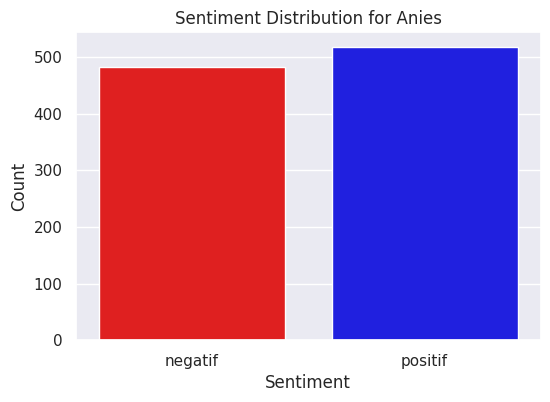

<ipython-input-161-0ed6c919e9fe>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['klasifikasi'], palette=colors)


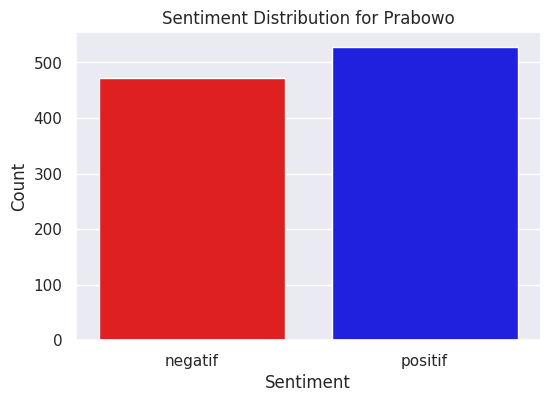

<ipython-input-161-0ed6c919e9fe>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['klasifikasi'], palette=colors)


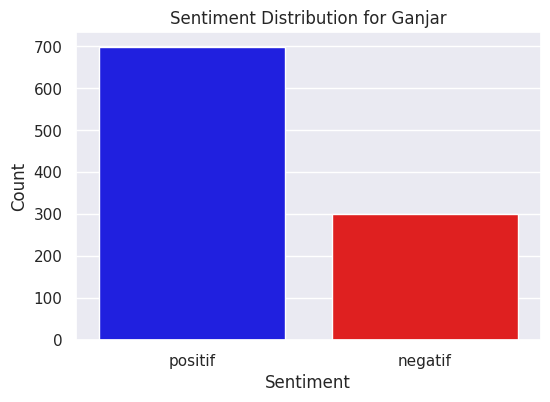

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Warna untuk kategori sentimen
colors = {'positif': 'blue', 'negatif': 'red'}

# 1. Visualisasi Distribusi Sentimen untuk Setiap Kandidat
def plot_sentiment_distribution(data, title):
    if data is None:
        print(f"Skipping visualization for {title}.")
        return

    plt.figure(figsize=(6, 4))
    sns.countplot(x=data['klasifikasi'], palette=colors)
    plt.title(f"Sentiment Distribution for {title}")
    plt.xlabel("Sentiment")
    plt.ylabel("Count")
    plt.show()

plot_sentiment_distribution(data_anies, "Anies")
plot_sentiment_distribution(data_prabowo, "Prabowo")
plot_sentiment_distribution(data_ganjar, "Ganjar")

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Fungsi untuk mengurutkan data dan memberikan warna bertingkat
def sorted_barplot(counts, title, colors):
    sorted_counts = dict(sorted(counts.items(), key=lambda item: item[1]))  # Urutkan dari kecil ke besar
    categories = list(sorted_counts.keys())
    values = list(sorted_counts.values())

    plt.figure(figsize=(6, 4))
    sns.barplot(x=categories, y=values, hue=categories, palette=colors, legend=False)  # Tambahkan legend=False
    plt.title(title)
    plt.xlabel("Candidate")
    plt.ylabel("Count")
    plt.show()

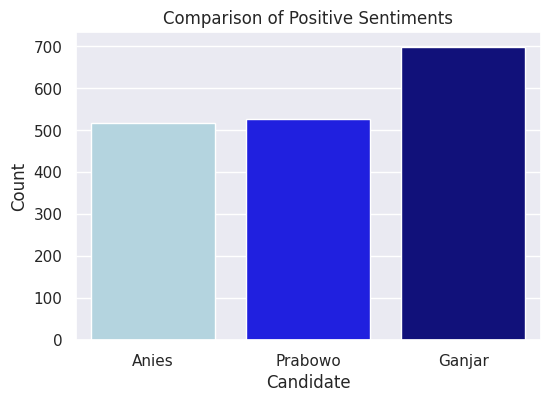

In [ ]:
positive_counts = {
    "Anies": data_anies['klasifikasi'].value_counts().get('positif', 0),
    "Prabowo": data_prabowo['klasifikasi'].value_counts().get('positif', 0),
    "Ganjar": data_ganjar['klasifikasi'].value_counts().get('positif', 0)
}

blue_shades = ['lightblue', 'blue', 'darkblue']  # Warna dari pudar ke pekat
sorted_barplot(positive_counts, "Comparison of Positive Sentiments", blue_shades)

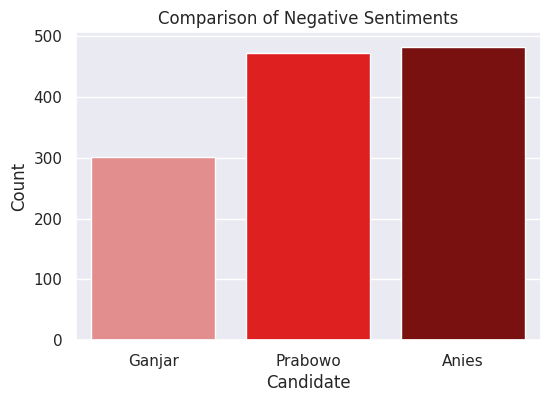

In [ ]:
negative_counts = {
    "Anies": data_anies['klasifikasi'].value_counts().get('negatif', 0),
    "Prabowo": data_prabowo['klasifikasi'].value_counts().get('negatif', 0),
    "Ganjar": data_ganjar['klasifikasi'].value_counts().get('negatif', 0)
}

red_shades = ['lightcoral', 'red', 'darkred']  # Warna dari pudar ke pekat
sorted_barplot(negative_counts, "Comparison of Negative Sentiments", red_shades)

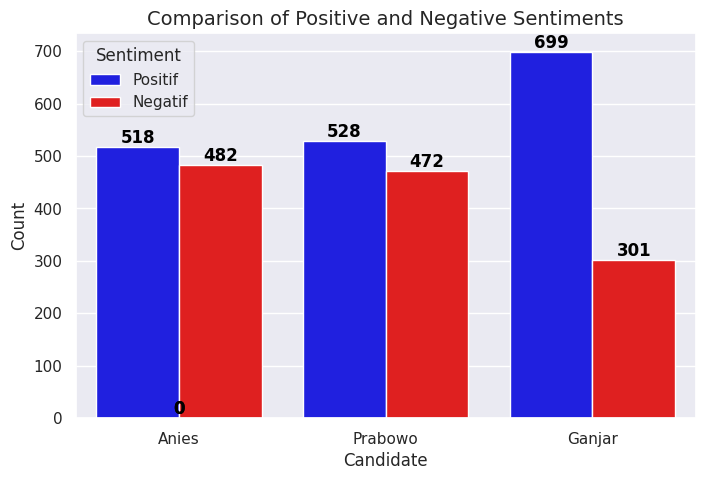

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data jumlah sentimen positif dan negatif
sentiment_counts = {
    "Anies": {
        "Positif": data_anies['klasifikasi'].value_counts().get('positif', 0),
        "Negatif": data_anies['klasifikasi'].value_counts().get('negatif', 0)
    },
    "Prabowo": {
        "Positif": data_prabowo['klasifikasi'].value_counts().get('positif', 0),
        "Negatif": data_prabowo['klasifikasi'].value_counts().get('negatif', 0)
    },
    "Ganjar": {
        "Positif": data_ganjar['klasifikasi'].value_counts().get('positif', 0),
        "Negatif": data_ganjar['klasifikasi'].value_counts().get('negatif', 0)
    }
}

# Mengonversi data ke dalam format DataFrame
import pandas as pd
df_sentiment = pd.DataFrame(sentiment_counts).T  # Transpose agar kandidat jadi indeks
df_sentiment = df_sentiment.reset_index().melt(id_vars="index", var_name="Sentiment", value_name="Count")
df_sentiment.rename(columns={"index": "Candidate"}, inplace=True)

# Membuat visualisasi
plt.figure(figsize=(8, 5))
ax = sns.barplot(x="Candidate", y="Count", hue="Sentiment", data=df_sentiment, palette={"Positif": "blue", "Negatif": "red"})

# Menampilkan label di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

# Menambahkan judul dan label
plt.title("Comparison of Positive and Negative Sentiments", fontsize=14)
plt.xlabel("Candidate", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Sentiment")
plt.show()
